In [1]:
import numpy as np
import matplotlib.pyplot as plt

def plot_grid(mask):
    if mask.dtype != 'int':
        raise ValueError("mask should consist of int")
    mas_of_colors=np.empty(mask.shape,dtype='U5')
    mas_of_colors[:]='red'
    mas_of_colors[mask==1]='blue'
    print(mas_of_colors)
    x,y=np.indices((N,N))
    x=x.ravel()
    y=y.ravel()
    new_mas_of_colors=np.empty(mask.shape,dtype='U5')
    for i in range(N):
        new_mas_of_colors[i]=mas_of_colors[-1-i]
    new_mas_of_colors=new_mas_of_colors.ravel()
    for t in range(N*N):
        plt.scatter(y[t],x[t],color=new_mas_of_colors[t])
    plt.show()
    
def get_neighbours(i,j):
    otv=[]
    
    if ((0<= (i-1)<N) and (0<= j <N)):
        otv.append([i-1,j])
    if ((0<= (i+1)<N) and (0<= j <N)):
        otv.append([i+1,j])
    if ((0<= i <N) and (0<= (j-1) <N)):
        otv.append([i,j-1])
    if ((0<= i <N) and (0<= (j+1) <N)):
        otv.append([i,j+1])
    
    return otv
    
def check_if_fits(mask):
    for i in range(0,N):
        for j in range(0,N):
            if (mask[i,j]==1):
                s=0
                mas=get_neighbours(i,j)
                for t in range(0,len(mas)):
                    a,b=mas[t]
                    s=s+mask[a,b]
                if s!=0:
                    #print("i=",i,"j=",j,"a=",a,"b=",b,"s=",s)
                    return 0
            
    return 1
            
def give_fitting_graph():
    mask=np.random.choice([0,1],N*N).reshape(N,N)
    it_fits=check_if_fits(mask)
    while(it_fits!=1):
        mask=np.random.choice([0,1],N*N).reshape(N,N)
        it_fits=check_if_fits(mask)
    return mask
        


def metropolis(start,niter):
    current=start
    apost_density=[current]
    for i in range(niter):
        proposed=give_fitting_graph()
        p=0.5
        following=current
        if np.random.rand() <p:
            following=proposed
        apost_density.append(following)
    return apost_density




[['red' 'red' 'red' 'blue' 'red']
 ['blue' 'red' 'red' 'red' 'red']
 ['red' 'red' 'blue' 'red' 'red']
 ['blue' 'red' 'red' 'red' 'red']
 ['red' 'blue' 'red' 'red' 'red']]


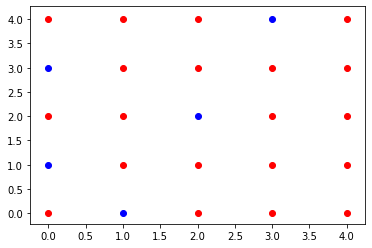

[5 5 5 5 4 5 5 6 5 7 6 5 5 6 5 8 5 5 5 5 6 5 5 5 5 5 7 7 5 5]
mean amount of black vertises in 5*5 graph= 5.4


In [3]:
N=5
NITER=30
start=give_fitting_graph()
plot_grid(start)
apost_density=metropolis(start,NITER)
#print(apost_density)

mas=[]
for i in range(NITER):
    mas.append(apost_density[i].sum())
print(np.array(mas))
print("mean amount of black vertises in 5*5 graph=",np.array(mas).mean())


